# Banana Harvest Prediction

In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read csv
df = pd.read_csv('./dataset/harvest_dataset_v7.csv')

In [3]:
df.head()
df['Plant density(Min=1,Max=5)'].unique()

array(['more than 5', '2', '5', '1', '4', '3'], dtype=object)

In [4]:
# Replace 'more than 5' with 5
df['Plant density(Min=1,Max=5)'] = df['Plant density(Min=1,Max=5)'].replace('more than 5', '5')
# Convert the column to numeric values
df['Plant density(Min=1,Max=5)'] = pd.to_numeric(df['Plant density(Min=1,Max=5)'], errors='coerce')

In [5]:
df['Plant density(Min=1,Max=5)'].unique()

array([5, 2, 1, 4, 3], dtype=int64)

## 1. Feature Description
---
| Property | Description |
|----------|-------------|
| Plant ID | Unique identifier for each banana plant |
| Variety | The type of banana variety being grown (e.g. Cavendish, Williams, etc.) |
| Agro-climatic region | The region in Sri Lanka where the plant is being grown (Wet Zone, Intermediate Zone, or Dry Zone) |
| Plant density | The number of banana plants per unit area of land |
| Spacing between plants | The distance between adjacent banana plants |
| Plant generation | Whether the plant is a first generation or subsequent generation plant |
| Fertilizer type | The type of fertilizer used (organic or chemical) |
| Soil pH | The pH level of the soil where the plant is being grown |
| Amount of sunlight received | The amount of sunlight the plant receives (low, moderate, or high) |
| Watering schedule | The frequency of watering (daily, twice a week, once a week, or no watering) |
| Number of days for flower initiation | The number of days it takes for the plant to begin producing flowers |
| Number of leaves | The number of leaves on the plant |
| Height (in feet) | The height of the plant |
| Yield per plant (kg) | The yield of bananas produced by the plant |

Each row in the dataset would contain the values of these properties for a single banana plant. The yield per plant would be the target variable, which is what we are trying to predict.

In [6]:
df.columns

Index(['Plant ID', 'Variety', 'Agro-climatic region',
       'Plant density(Min=1,Max=5)', 'Spacing between plants (m)',
       'Plant generation', 'Pesticides used(Yes, No)', 'Fertilizer type',
       'Soil pH', 'Amount of sunlight received', 'Watering schedule',
       'Number of leaves', 'Height (m)', 'Yield per plant (kg)'],
      dtype='object')

## 2. Exploratory Data Analysis(EDA)

In [7]:
# database shape
df.shape

(272, 14)

In [8]:
# data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Plant ID                     272 non-null    int64  
 1   Variety                      272 non-null    object 
 2   Agro-climatic region         272 non-null    object 
 3   Plant density(Min=1,Max=5)   272 non-null    int64  
 4   Spacing between plants (m)   272 non-null    float64
 5   Plant generation             272 non-null    object 
 6   Pesticides used(Yes, No)     272 non-null    object 
 7   Fertilizer type              272 non-null    object 
 8   Soil pH                      272 non-null    float64
 9   Amount of sunlight received  272 non-null    object 
 10  Watering schedule            272 non-null    object 
 11  Number of leaves             272 non-null    int64  
 12  Height (m)                   272 non-null    float64
 13  Yield per plant (kg)

In [9]:
# is there missing data
df.isnull().any()

Plant ID                       False
Variety                        False
Agro-climatic region           False
Plant density(Min=1,Max=5)     False
Spacing between plants (m)     False
Plant generation               False
Pesticides used(Yes, No)       False
Fertilizer type                False
Soil pH                        False
Amount of sunlight received    False
Watering schedule              False
Number of leaves               False
Height (m)                     False
Yield per plant (kg)           False
dtype: bool

<AxesSubplot:>

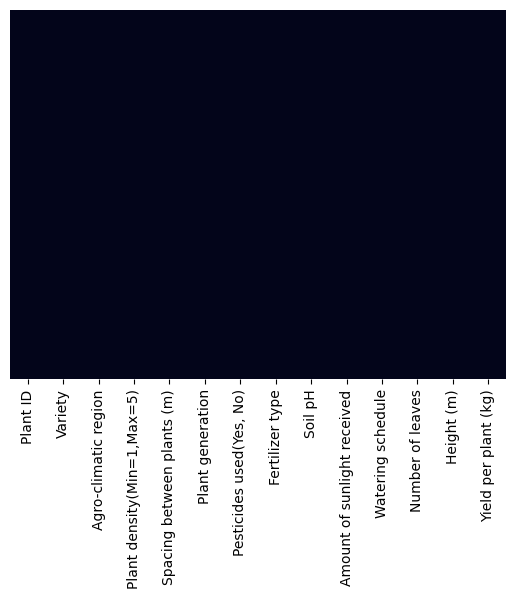

In [10]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False)

> Seems `If Yes what Category of pesticides have used` is majority null

In [11]:
# drop that column
df = df.dropna(axis=1)

Index(['Plant ID', 'Variety', 'Agro-climatic region',
       'Plant density(Min=1,Max=5)', 'Spacing between plants (m)',
       'Plant generation', 'Pesticides used(Yes, No)', 'Fertilizer type',
       'Soil pH', 'Amount of sunlight received', 'Watering schedule',
       'Number of leaves', 'Height (m)', 'Yield per plant (kg)'],
      dtype='object')

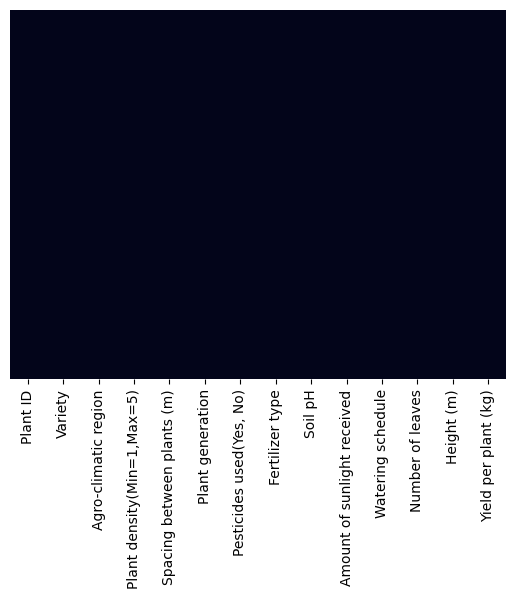

In [12]:

sns.heatmap(df.isnull(), yticklabels=False, cbar=False)
df.columns

In [13]:
# what are the null rows
null_yields = df[df['Yield per plant (kg)'].isnull()]
null_yields.head()

,Plant ID,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant (kg)


In [14]:
# summary of statistics
df.describe()

,Plant ID,"Plant density(Min=1,Max=5)",Spacing between plants (m),Soil pH,Number of leaves,Height (m),Yield per plant (kg)
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,135.500000,3.125000,2.156801,6.308566,12.047794,3.620588,23.344853
std,78.663842,1.492602,1.341335,0.502641,2.861101,0.662225,11.670465
min,0.000000,1.000000,0.100000,5.500000,7.000000,2.000000,1.000000
25%,67.750000,2.000000,0.870000,5.962500,9.000000,3.100000,13.125000
50%,135.500000,3.000000,2.080000,6.255000,13.000000,3.700000,24.450000
75%,203.250000,5.000000,3.382500,6.520000,15.000000,4.100000,33.325000
max,271.000000,5.000000,4.900000,7.490000,16.000000,5.000000,49.000000


##### What are the varieties available?

In [15]:
df['Variety'].unique()

array(['Pisang Awak Banana', 'Anamalu Banana', 'Amban Banana',
       'Mysore Banana', 'Silk Banana'], dtype=object)

Text(0.5, 1.0, 'Distribution of Varieties')

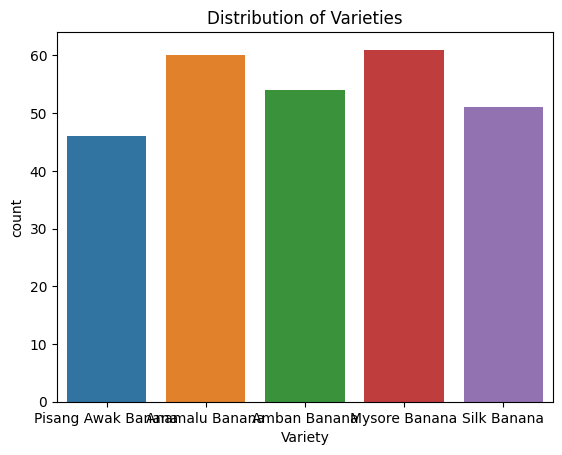

In [16]:
sns.countplot(x='Variety', data=df)
# add a title to the plot
plt.title('Distribution of Varieties')

> `Robusta`, `Gros Michewarf`, `Cavendish` have lesser records compared to other varieties

In [17]:
df['Agro-climatic region'].unique()

array(['Dry Zone', 'Intermediate Zone', 'Wet Zone'], dtype=object)

Text(0.5, 1.0, 'Agro-climatic region')

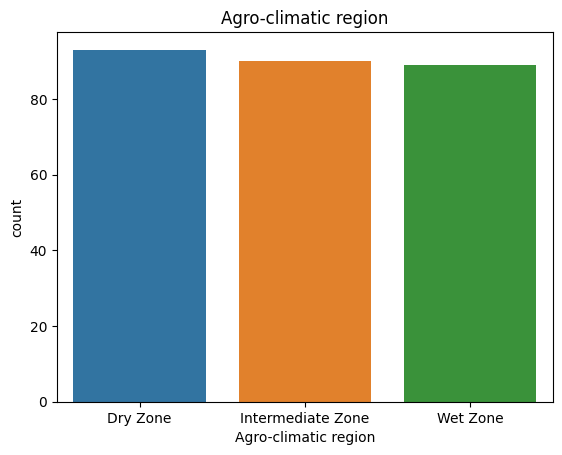

In [18]:
sns.countplot(x='Agro-climatic region', data=df)
# add a title to the plot
plt.title('Agro-climatic region')

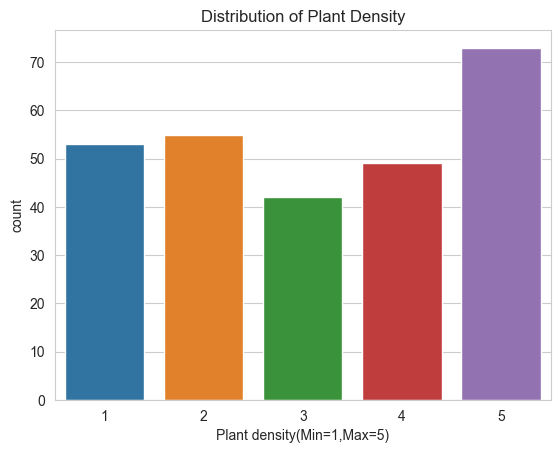

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Plant density(Min=1,Max=5)', data=df)
plt.title('Distribution of Plant Density')
plt.show()

> - Plant density 3 is the most common plant density in the dataset
> - Plant density 2 and 5 is the least common plant density in the dataset

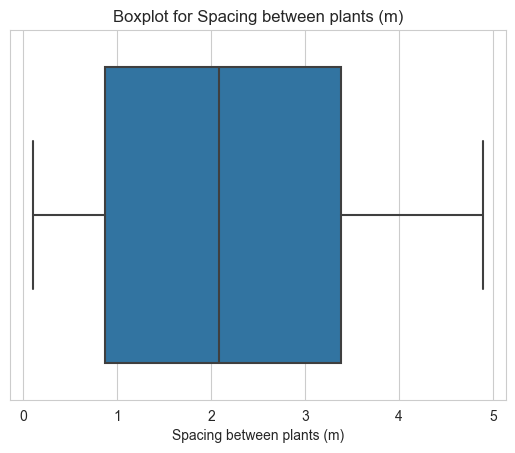

In [20]:
# Create a boxplot
sns.boxplot(x="Spacing between plants (m)", data=df)
plt.title("Boxplot for Spacing between plants (m)")
plt.show()

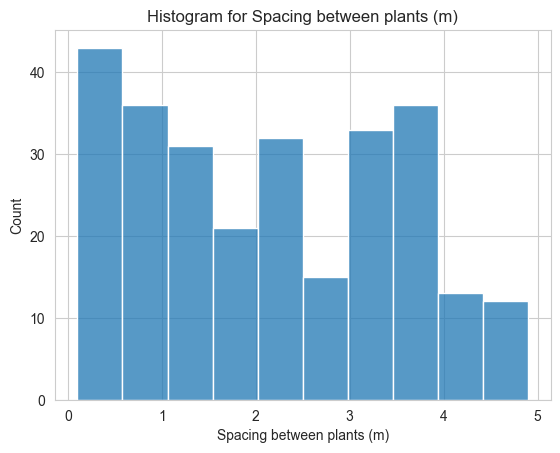

In [21]:
# Create a histogram
sns.histplot(x="Spacing between plants (m)", data=df, bins=10)
plt.title("Histogram for Spacing between plants (m)")
plt.show()

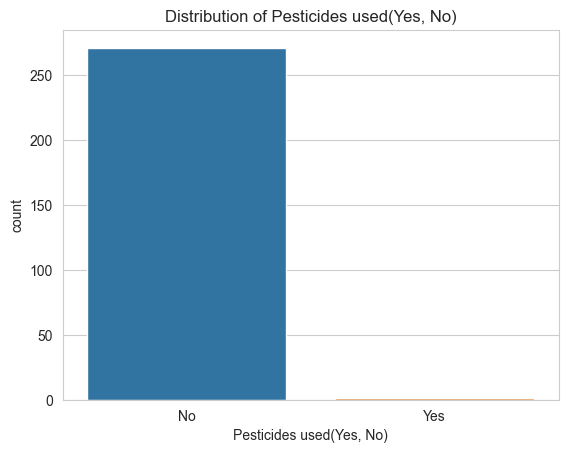

In [22]:
sns.countplot(x='Pesticides used(Yes, No)', data=df)
plt.title('Distribution of Pesticides used(Yes, No)')
plt.show()

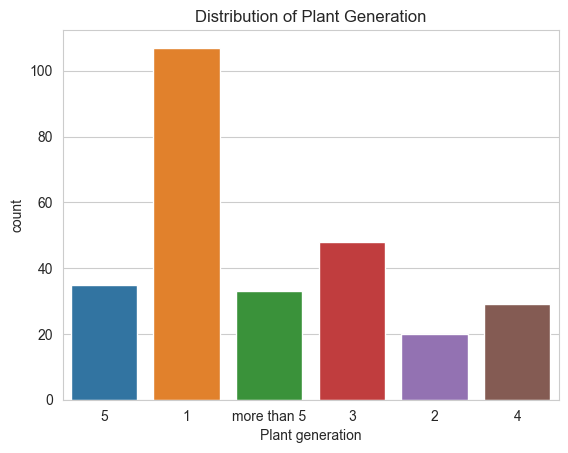

In [23]:
sns.countplot(x='Plant generation', data=df)
plt.title('Distribution of Plant Generation')
plt.show()

In [24]:
df['Fertilizer type'].unique()

array(['Organic', 'None', 'Both used', 'Non Organic'], dtype=object)

Text(0.5, 1.0, 'Distribution of Fertilizer Type')

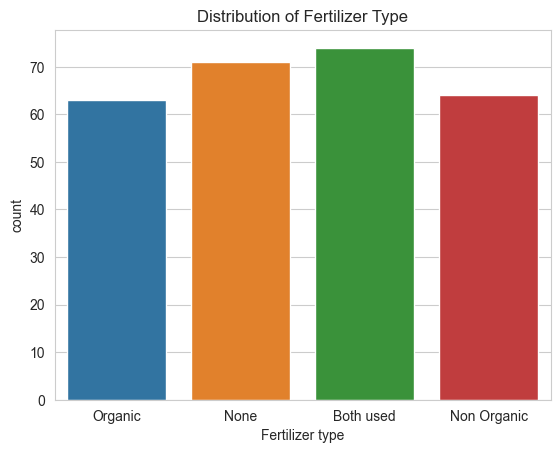

In [25]:
sns.countplot(x='Fertilizer type', data=df)
# add a title to the plot
plt.title('Distribution of Fertilizer Type')

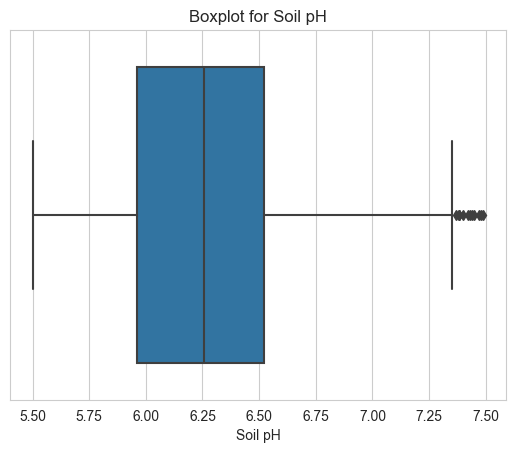

In [26]:

# Create a boxplot
sns.boxplot(x="Soil pH", data=df)
plt.title("Boxplot for Soil pH")
plt.show()

In [27]:
df['Amount of sunlight received'].unique()

array(['Moderate', 'High', 'Low'], dtype=object)

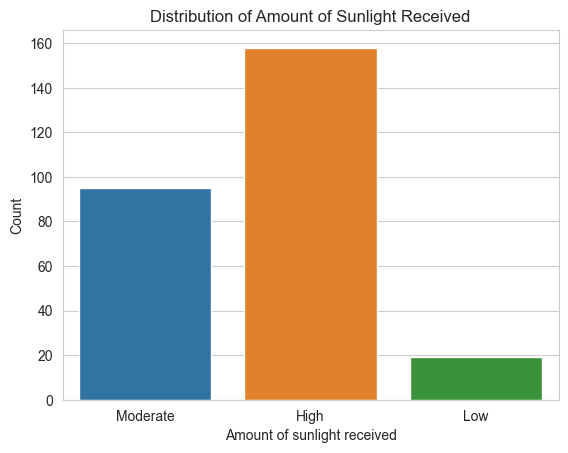

In [28]:
sns.countplot(x='Amount of sunlight received', data=df)
plt.title('Distribution of Amount of Sunlight Received')
plt.xlabel('Amount of sunlight received')
plt.ylabel('Count')
plt.show()

In [29]:
df['Watering schedule'].unique()

array(['randomly', 'none', 'Daily', 'twice a week', '3 times a week'],
      dtype=object)

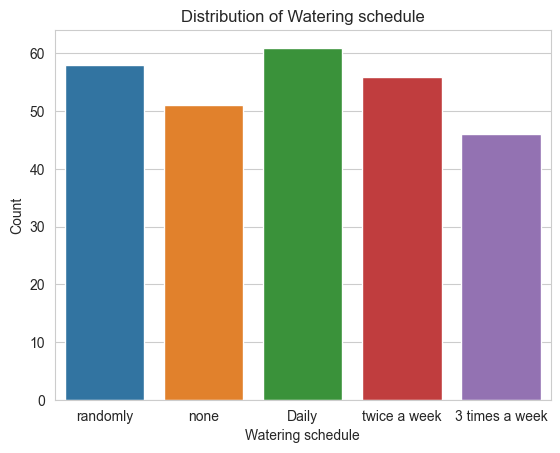

In [30]:
sns.countplot(x='Watering schedule', data=df)
plt.title('Distribution of Watering schedule')
plt.xlabel('Watering schedule')
plt.ylabel('Count')
plt.show()

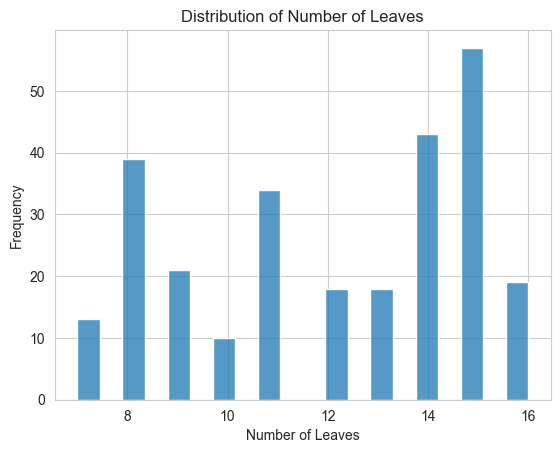

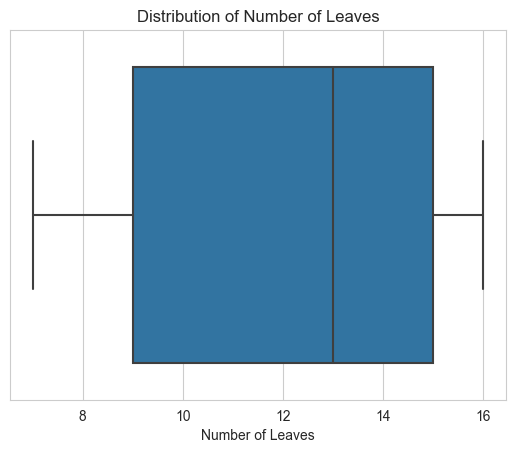

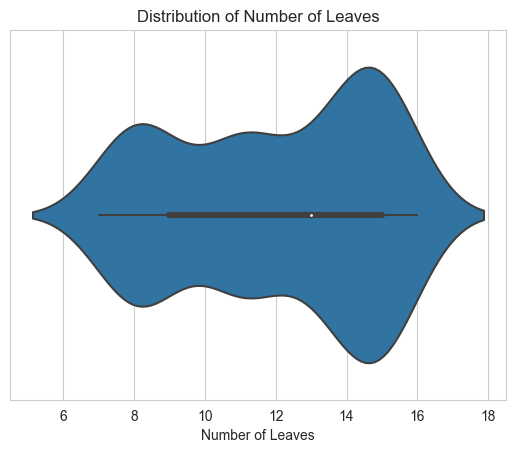

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  app.launch_new_instance()


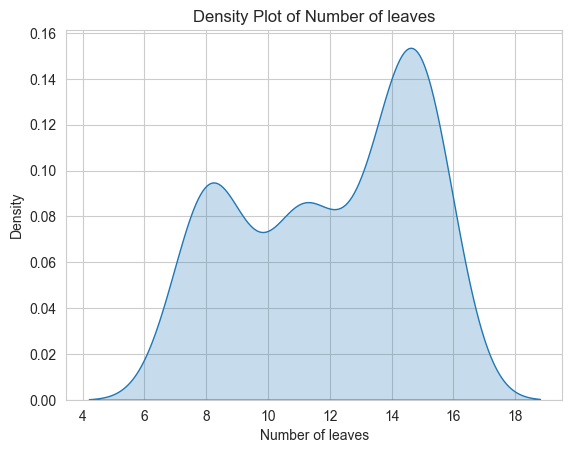

In [31]:
sns.histplot(df['Number of leaves'], bins=20)
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df['Number of leaves'])
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.show()

sns.violinplot(x=df['Number of leaves'])
plt.title('Distribution of Number of Leaves')
plt.xlabel('Number of Leaves')
plt.show()

sns.kdeplot(df['Number of leaves'], shade=True)
plt.title('Density Plot of Number of leaves')
plt.xlabel('Number of leaves')
plt.ylabel('Density')
plt.show()

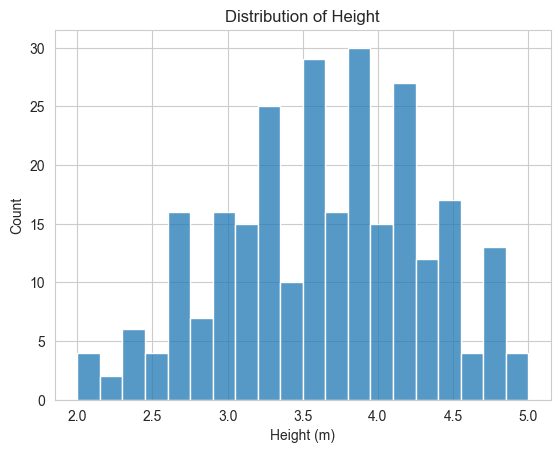

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


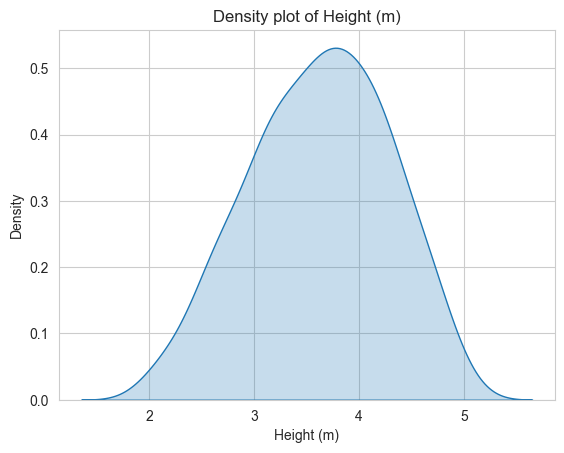

In [32]:
# Plot for 'Height (m)'
sns.histplot(df['Height (m)'], bins=20, kde=False)
plt.title('Distribution of Height')
plt.xlabel('Height (m)')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Height (m)'], shade=True)
plt.title('Density plot of Height (m)')
plt.show()

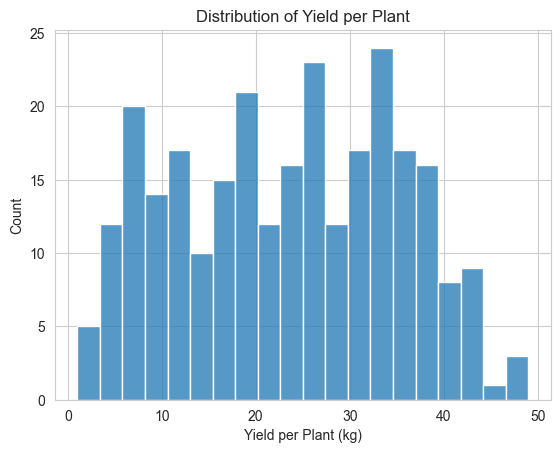

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  


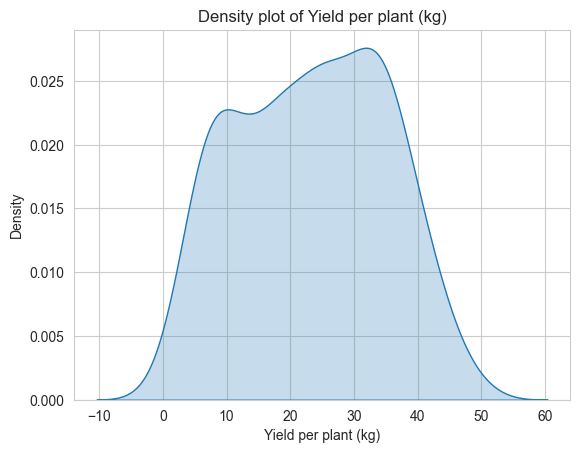

In [33]:
# Plot for 'Yield per plant (kg)'
sns.histplot(df['Yield per plant (kg)'], bins=20, kde=False)
plt.title('Distribution of Yield per Plant')
plt.xlabel('Yield per Plant (kg)')
plt.ylabel('Count')
plt.show()

sns.kdeplot(df['Yield per plant (kg)'], shade=True)
plt.title('Density plot of Yield per plant (kg)')
plt.show()

#### Relationship between features

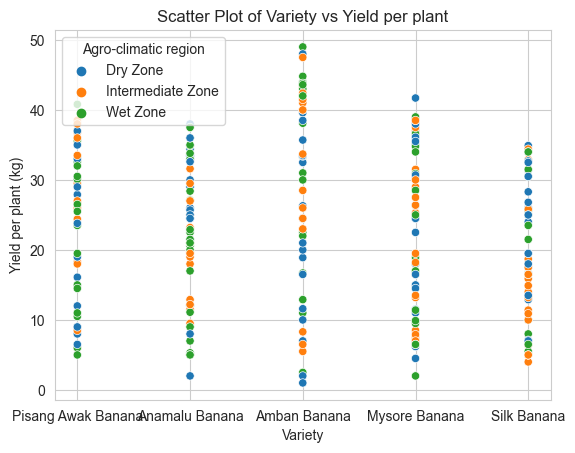

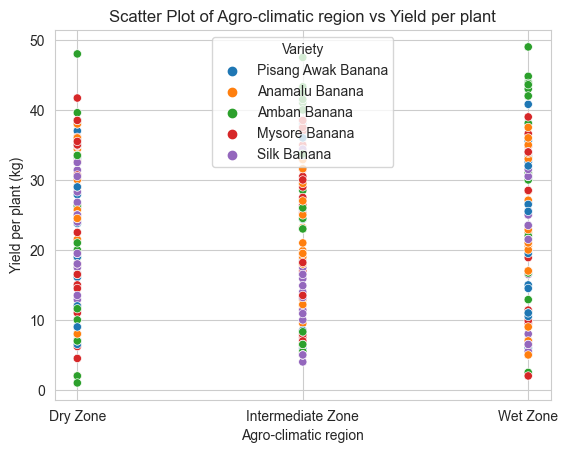

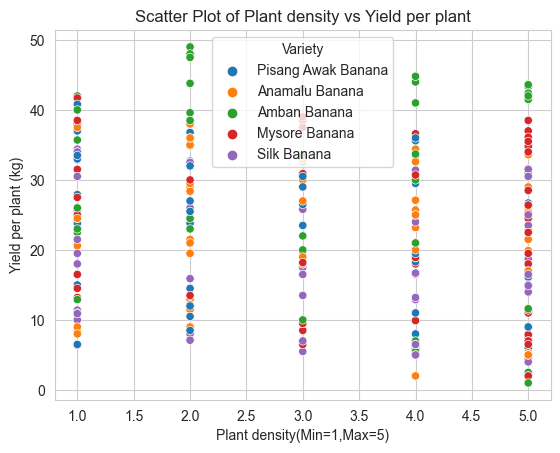

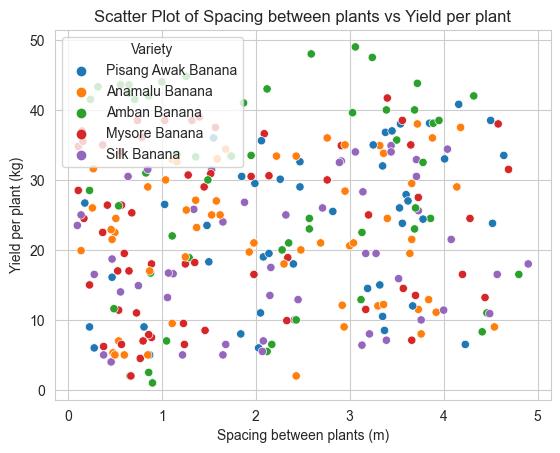

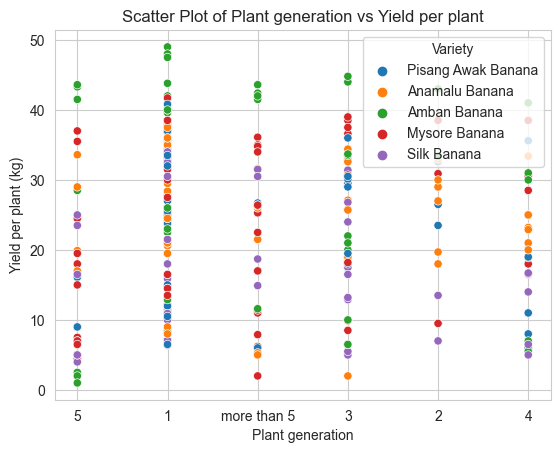

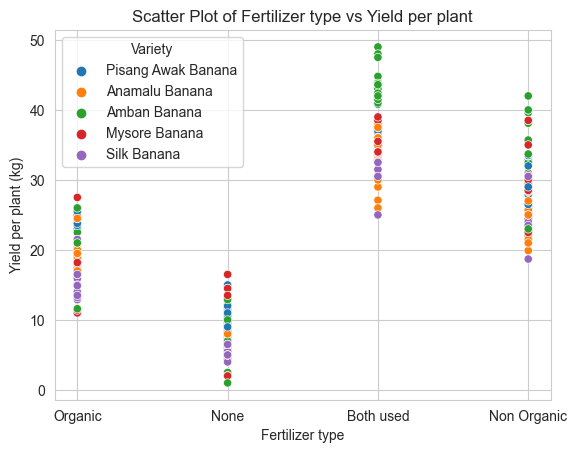

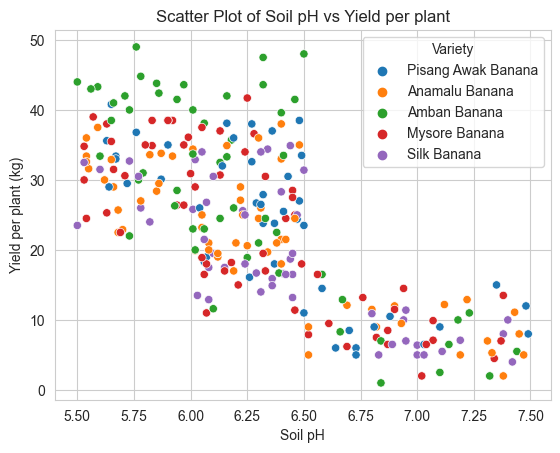

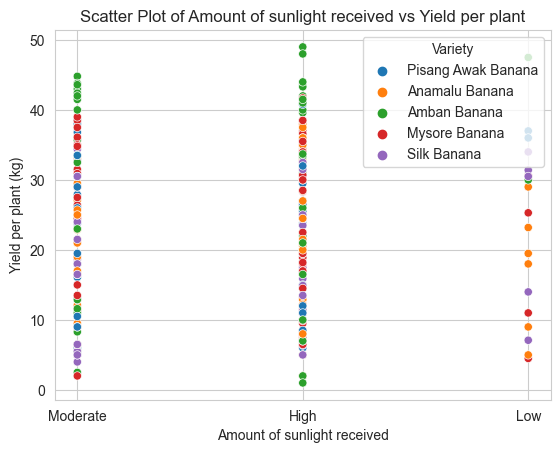

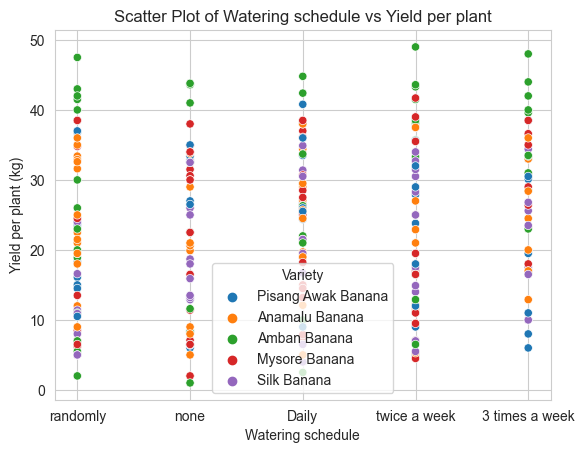

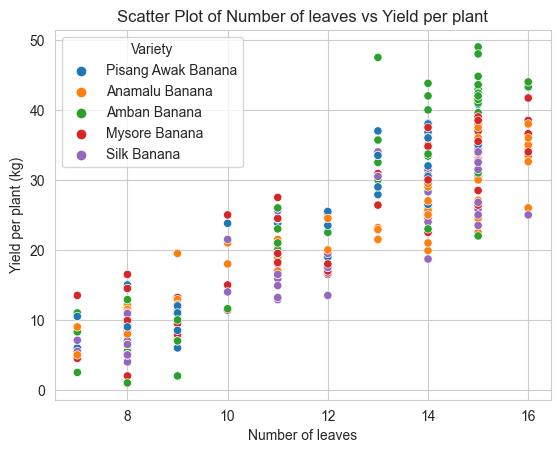

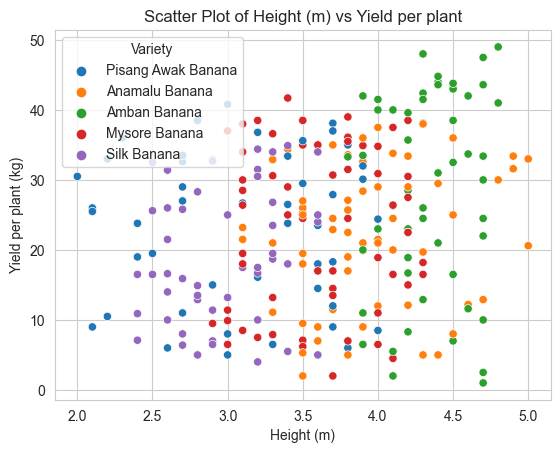

In [34]:
# Scatter plot for 'Variety' vs 'Yield per plant'
sns.scatterplot(x='Variety', y='Yield per plant (kg)', hue='Agro-climatic region', data=df)
plt.title('Scatter Plot of Variety vs Yield per plant')
plt.show()

# Scatter plot for 'Agro-climatic region' vs 'Yield per plant'
sns.scatterplot(x='Agro-climatic region', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Agro-climatic region vs Yield per plant')
plt.show()

# Scatter plot for 'Plant density' vs 'Yield per plant'
sns.scatterplot(x='Plant density(Min=1,Max=5)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Plant density vs Yield per plant')
plt.show()

# Scatter plot for 'Spacing between plants (m)' vs 'Yield per plant'
sns.scatterplot(x='Spacing between plants (m)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Spacing between plants vs Yield per plant')
plt.show()

# Scatter plot for 'Plant generation' vs 'Yield per plant'
sns.scatterplot(x='Plant generation', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Plant generation vs Yield per plant')
plt.show()

# Scatter plot for 'Fertilizer type' vs 'Yield per plant'
sns.scatterplot(x='Fertilizer type', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Fertilizer type vs Yield per plant')
plt.show()

# Scatter plot for 'Soil pH' vs 'Yield per plant'
sns.scatterplot(x='Soil pH', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Soil pH vs Yield per plant')
plt.show()

# Scatter plot for 'Amount of sunlight received' vs 'Yield per plant'
sns.scatterplot(x='Amount of sunlight received', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Amount of sunlight received vs Yield per plant')
plt.show()

# Scatter plot for 'Watering schedule' vs 'Yield per plant'
sns.scatterplot(x='Watering schedule', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Watering schedule vs Yield per plant')
plt.show()

# Scatter plot for 'Number of leaves' vs 'Yield per plant'
sns.scatterplot(x='Number of leaves', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Number of leaves vs Yield per plant')
plt.show()

# Scatter plot for 'Height (m)' vs 'Yield per plant'
sns.scatterplot(x='Height (m)', y='Yield per plant (kg)', hue='Variety', data=df)
plt.title('Scatter Plot of Height (m) vs Yield per plant')
plt.show()

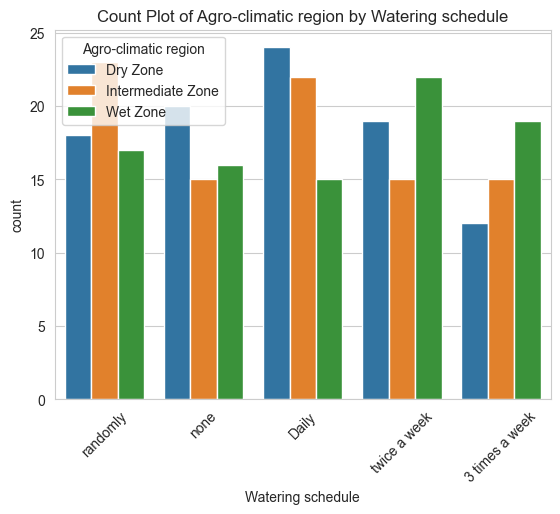

In [35]:
sns.countplot(x='Watering schedule', hue='Agro-climatic region', data=df)
plt.title('Count Plot of Agro-climatic region by Watering schedule')
plt.xticks(rotation=45)
plt.legend(title='Agro-climatic region')
plt.show()

In [36]:
for i in df.columns:
    print(i, df[i].unique())

Plant ID [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 2

In [37]:
range_gap = 10
max_value = df['Yield per plant (kg)'].max()
upper_bound = math.ceil(max_value / range_gap) * range_gap

bin_edges = [i for i in range(0, upper_bound+range_gap, range_gap)]
# create bin labels dynamically
bin_labels = [f"{bin_edges[i]}-{bin_edges[i+1]-1} kg" for i in range(len(bin_edges)-1)]
print(f'Max Value: {max_value}')
print(f'Bins:{bin_labels}')
      # Use the pd.cut() function to create a new column with the range labels
df['Yield per plant range'] = pd.cut(df['Yield per plant (kg)'], bins=bin_edges, labels=bin_labels)
df.head(50)

Max Value: 49.0
Bins:['0-9 kg', '10-19 kg', '20-29 kg', '30-39 kg', '40-49 kg']


,Plant ID,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant (kg),Yield per plant range
0,0,Pisang Awak Banana,Dry Zone,5,0.47,5,No,Organic,6.26,Moderate,randomly,11,3.2,16.1,10-19 kg
1,1,Anamalu Banana,Intermediate Zone,2,3.30,1,No,None,6.90,High,randomly,9,4.0,12.0,10-19 kg
2,2,Amban Banana,Wet Zone,5,0.65,more than 5,No,Both used,5.97,High,none,15,4.7,43.6,40-49 kg
3,3,Anamalu Banana,Dry Zone,2,2.92,1,No,None,6.69,Moderate,Daily,8,4.2,12.1,10-19 kg
4,4,Mysore Banana,Intermediate Zone,1,4.44,1,No,None,6.76,High,Daily,9,3.3,13.2,10-19 kg
5,5,Anamalu Banana,Dry Zone,4,1.68,3,No,Both used,6.01,High,Daily,16,3.4,34.4,30-39 kg
6,6,Mysore Banana,Dry Zone,2,3.17,1,No,None,6.90,High,twice a week,8,3.7,11.5,10-19 kg
7,7,Amban Banana,Intermediate Zone,5,0.23,5,No,Non Organic,5.94,High,3 times a week,14,4.2,28.5,20-29 kg
8,8,Anamalu Banana,Intermediate Zone,3,1.93,2,No,Organic,6.34,High,Daily,12,4.3,19.7,10-19 kg
9,9,Anamalu Banana,Intermediate Zone,4,1.37,4,No,Non Organic,6.05,Low,3 times a week,13,3.1,23.2,20-29 kg


<AxesSubplot:ylabel='Yield per plant range'>

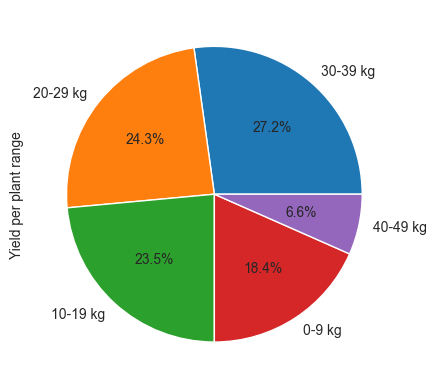

In [38]:
# Count the number of data points in each range
range_counts = df['Yield per plant range'].value_counts()

# Plot a pie chart of the range proportions
range_counts.plot.pie(autopct='%1.1f%%', labels=range_counts.index)

## 3. Correlation Matrix

<AxesSubplot:>

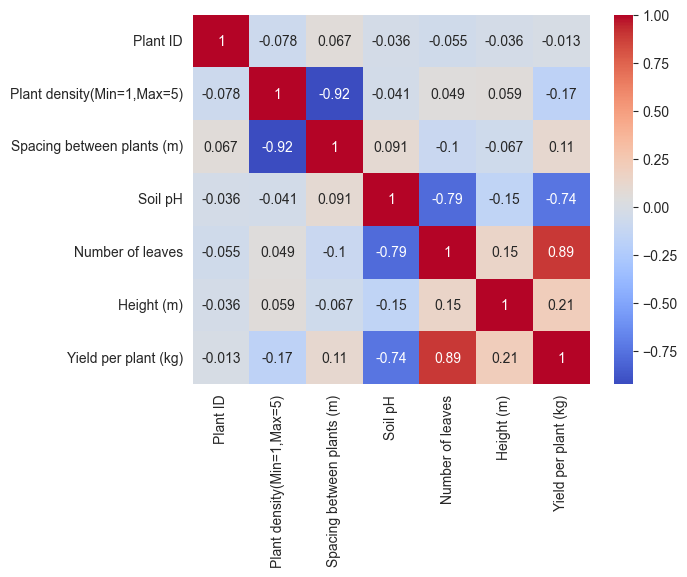

In [39]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

> No highly correlated features(considered threshold = 0.9)

## 3. Data Pre Processing

In [40]:
# drop plant id column
df.drop(['Plant ID', 'Yield per plant (kg)'], axis=1, inplace=True)
df.head(50)

,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m),Yield per plant range
0,Pisang Awak Banana,Dry Zone,5,0.47,5,No,Organic,6.26,Moderate,randomly,11,3.2,10-19 kg
1,Anamalu Banana,Intermediate Zone,2,3.30,1,No,None,6.90,High,randomly,9,4.0,10-19 kg
2,Amban Banana,Wet Zone,5,0.65,more than 5,No,Both used,5.97,High,none,15,4.7,40-49 kg
3,Anamalu Banana,Dry Zone,2,2.92,1,No,None,6.69,Moderate,Daily,8,4.2,10-19 kg
4,Mysore Banana,Intermediate Zone,1,4.44,1,No,None,6.76,High,Daily,9,3.3,10-19 kg
5,Anamalu Banana,Dry Zone,4,1.68,3,No,Both used,6.01,High,Daily,16,3.4,30-39 kg
6,Mysore Banana,Dry Zone,2,3.17,1,No,None,6.90,High,twice a week,8,3.7,10-19 kg
7,Amban Banana,Intermediate Zone,5,0.23,5,No,Non Organic,5.94,High,3 times a week,14,4.2,20-29 kg
8,Anamalu Banana,Intermediate Zone,3,1.93,2,No,Organic,6.34,High,Daily,12,4.3,10-19 kg
9,Anamalu Banana,Intermediate Zone,4,1.37,4,No,Non Organic,6.05,Low,3 times a week,13,3.1,20-29 kg


#### Split dataset into independant and dependant variables

In [41]:
X = df.drop('Yield per plant range', axis=1)
y = df['Yield per plant range']

## 4. Data Encoding

#### OneHot encode
>One-hot encoding is a technique used to convert categorical data into numerical data.
> In machine learning, we often encounter datasets that contain categorical features
> such as colors, cities, or types of products. These categorical features can't be
 > used directly in most machine learning models because they require numerical data.
>
>One-hot encoding solves this problem by converting categorical features into binary
> vectors. Each category is assigned a unique binary vector, with a 1 in the position
> corresponding to that category, and 0s elsewhere.
> >For example,
> >if we have three categories `A`, `B`, and `C`, then
> >
> > `A=[1, 0, 0]`, `B=[0, 1, 0]`, and `C=[0, 0, 1]`.
>
> By using one-hot encoding, we can transform categorical data into numerical data
> that can be used in machine learning models. One-hot encoding helps models to
> capture non-linear relationships between categorical features and the target
> variable. It also prevents the model from assigning ordinality to the categories,
> which could introduce bias in the analysis.
>
> In summary, one-hot encoding is a technique used to transform categorical data
> into binary vectors, making it suitable for use in machine learning models.


 Following columns are OneHot Encoded`Variety`, `Agro-climatic region`, `Fertilizer type`

In [42]:
X.head()

,Variety,Agro-climatic region,"Plant density(Min=1,Max=5)",Spacing between plants (m),Plant generation,"Pesticides used(Yes, No)",Fertilizer type,Soil pH,Amount of sunlight received,Watering schedule,Number of leaves,Height (m)
0,Pisang Awak Banana,Dry Zone,5,0.47,5,No,Organic,6.26,Moderate,randomly,11,3.2
1,Anamalu Banana,Intermediate Zone,2,3.30,1,No,None,6.90,High,randomly,9,4.0
2,Amban Banana,Wet Zone,5,0.65,more than 5,No,Both used,5.97,High,none,15,4.7
3,Anamalu Banana,Dry Zone,2,2.92,1,No,None,6.69,Moderate,Daily,8,4.2
4,Mysore Banana,Intermediate Zone,1,4.44,1,No,None,6.76,High,Daily,9,3.3


In [43]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import pickle

# One-hot encode categorical columns
ohe_cols = ['Variety', 'Agro-climatic region', 'Fertilizer type', 'Pesticides used(Yes, No)']
ohe = OneHotEncoder(sparse=False, drop='first')
ohe_data = ohe.fit_transform(df[ohe_cols])

# Save the encoder object using pickle
with open('harvest_data_one_hot_encoded.pkl', 'wb') as f:
    pickle.dump(ohe, f)

# Print the encoded labels and their corresponding arrays
encoded_labels = ohe.get_feature_names_out(ohe_cols)
encoded_dict = {}
for i, label in enumerate(encoded_labels):
    encoded_dict[label] = ohe_data[:, i].tolist()
print(encoded_dict)

{'Variety_Anamalu Banana': [0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.

#### Ordinal Encode
>Ordinal encoding is a technique used to convert categorical variables
(variables with limited and fixed set of possible values) into numerical variables.
 It assigns a unique numerical value to each category, based on their alphabetical
> order or their frequency of occurrence.
> > For example,
> > if we have a categorical variable called `"Fruit"` with categories
> >`"Apple", "Banana"`, and `"Orange"`,
> > label encoding would assign the values `0, 1,` and `2` respectively.
>
> This helps in making categorical variables usable for machine learning algorithms,
> as most algorithms require numerical data as input. However, it is important to
> note that ordinal encoding is not always appropriate for all categorical variables
> and can sometimes lead to incorrect or biased results.

In [44]:
oe_cols = ['Amount of sunlight received', 'Watering schedule', 'Plant generation']

for col in oe_cols:
    print(df[col].unique())

['Moderate' 'High' 'Low']
['randomly' 'none' 'Daily' 'twice a week' '3 times a week']
['5' '1' 'more than 5' '3' '2' '4']


In [45]:
oe = OrdinalEncoder(
    categories=[
        ['Low', 'Moderate', 'High'],
        ['none', 'randomly', 'twice a week', '3 times a week', 'Daily'],
        ['1', '2', '4', '3', '5', 'more than 5']
    ]
)
oe_data = oe.fit_transform(df[oe_cols])

# Save the encoder object using pickle
with open('harvest_data_ordinal_encoded.pkl', 'wb') as f:
    pickle.dump(oe, f)

# Create a dictionary with column names as keys and encoded values as values
oe_dict = {}
for i, col in enumerate(oe_cols):
    oe_dict[col] = dict(zip(df[col], oe_data[:,i]))

# Print the dictionary
print(oe_dict)

{'Amount of sunlight received': {'Moderate': 1.0, 'High': 2.0, 'Low': 0.0}, 'Watering schedule': {'randomly': 1.0, 'none': 0.0, 'Daily': 4.0, 'twice a week': 2.0, '3 times a week': 3.0}, 'Plant generation': {'5': 4.0, '1': 0.0, 'more than 5': 5.0, '3': 3.0, '2': 1.0, '4': 2.0}}


In [46]:
other_columns = [
    'Plant density(Min=1,Max=5)',
    'Spacing between plants (m)',
    'Soil pH',
    'Number of leaves',
    'Height (m)'
]
# get other column data
non_categorical_data = df[other_columns].values
print(ohe_data.shape, oe_data.shape, non_categorical_data.shape)

(272, 10) (272, 3) (272, 5)


In [47]:
# Combine one-hot encoded and ordinal encoded data
x = np.hstack([ohe_data, oe_data, non_categorical_data])
x

array([[ 0.  ,  0.  ,  1.  , ...,  6.26, 11.  ,  3.2 ],
       [ 1.  ,  0.  ,  0.  , ...,  6.9 ,  9.  ,  4.  ],
       [ 0.  ,  0.  ,  0.  , ...,  5.97, 15.  ,  4.7 ],
       ...,
       [ 0.  ,  1.  ,  0.  , ...,  5.9 , 15.  ,  3.5 ],
       [ 0.  ,  0.  ,  0.  , ...,  6.01, 14.  ,  4.  ],
       [ 0.  ,  0.  ,  0.  , ...,  6.01, 14.  ,  4.  ]])

#### Encoding y

In [48]:
# y column
df[['Yield per plant range']]

,Yield per plant range
0,10-19 kg
1,10-19 kg
2,40-49 kg
3,10-19 kg
4,10-19 kg
...,...
267,20-29 kg
268,30-39 kg
269,30-39 kg
270,30-39 kg


In [49]:
# Extract the unique categories in y
y_categories = sorted(list(y.dropna().unique()))
print(y_categories)

['0-9 kg', '10-19 kg', '20-29 kg', '30-39 kg', '40-49 kg']


In [50]:
# Initialize the OrdinalEncoder object
oe_y = OrdinalEncoder(categories=[y_categories])
# Fit and transform y
y_data = oe_y.fit_transform(df[['Yield per plant range']])

# Save the encoder object using pickle
with open('y_data_ordinal_encoded.pkl', 'wb') as f:
    pickle.dump(oe_y, f)

# Create the dictionary
oe_y_dict = {}
for i, category in enumerate(oe_y.categories_[0]):
    oe_y_dict[category] = int(i)

# Print the dictionary
print(oe_y_dict)

{'0-9 kg': 0, '10-19 kg': 1, '20-29 kg': 2, '30-39 kg': 3, '40-49 kg': 4}


#### Test and Train Split

In [51]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y_data, test_size=0.2, random_state=42)

In [52]:
print('x train shape', x_train.shape)
print('x test shape',x_test.shape)
print('y train shape',y_train.shape)
print('y train shape',y_train.shape)

x train shape (217, 18)
x test shape (55, 18)
y train shape (217, 1)
y train shape (217, 1)


#### Standardize Data

In [53]:
from sklearn.preprocessing import StandardScaler

# Scale the training features using StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [54]:
# Scale the testing features using the same scaler object
x_test = scaler.transform(x_test)

## 5. Model Training and Evaluation

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [56]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f'Training: {name}')
    model.fit(x_train, y_train.ravel())
    y_pred = model.predict(x_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {
        'F1 score': f1,
        'Recall': recall,
        'Precision': precision,
        'Accuracy': accuracy,
        'Confusion Matrix': cm
    }

Training: Logistic Regression
Training: Decision Tree
Training: Random Forest
Training: SVM
Training: KNN
Training: Naive Bayes
Training: Gradient Boosting


In [57]:
print(results)

{'Logistic Regression': {'F1 score': 0.8180237154150196, 'Recall': 0.8181818181818182, 'Precision': 0.8247933884297521, 'Accuracy': 0.8181818181818182, 'Confusion Matrix': array([[ 8,  1,  0,  0,  0],
       [ 2, 10,  0,  0,  0],
       [ 0,  1,  9,  2,  0],
       [ 1,  0,  2, 16,  0],
       [ 0,  0,  0,  1,  2]], dtype=int64)}, 'Decision Tree': {'F1 score': 0.816529994070101, 'Recall': 0.8181818181818182, 'Precision': 0.8222077922077922, 'Accuracy': 0.8181818181818182, 'Confusion Matrix': array([[ 8,  1,  0,  0,  0],
       [ 0, 10,  2,  0,  0],
       [ 0,  3,  7,  2,  0],
       [ 0,  0,  1, 17,  1],
       [ 0,  0,  0,  0,  3]], dtype=int64)}, 'Random Forest': {'F1 score': 0.8713071378749128, 'Recall': 0.8727272727272727, 'Precision': 0.8774134955953138, 'Accuracy': 0.8727272727272727, 'Confusion Matrix': array([[ 8,  1,  0,  0,  0],
       [ 0, 11,  1,  0,  0],
       [ 0,  1,  9,  2,  0],
       [ 0,  0,  1, 18,  0],
       [ 0,  0,  0,  1,  2]], dtype=int64)}, 'SVM': {'F1 scor

Logistic Regression:
----------------------------------
F1 score: 0.8180237154150196
Recall: 0.8181818181818182
Precision: 0.8247933884297521
Accuracy: 0.8181818181818182

Decision Tree:
----------------------------------
F1 score: 0.816529994070101
Recall: 0.8181818181818182
Precision: 0.8222077922077922
Accuracy: 0.8181818181818182

Random Forest:
----------------------------------
F1 score: 0.8713071378749128
Recall: 0.8727272727272727
Precision: 0.8774134955953138
Accuracy: 0.8727272727272727

SVM:
----------------------------------
F1 score: 0.8362354312354312
Recall: 0.8363636363636363
Precision: 0.8468831168831169
Accuracy: 0.8363636363636363

KNN:
----------------------------------
F1 score: 0.7625549538593017
Recall: 0.7636363636363637
Precision: 0.7643841007477371
Accuracy: 0.7636363636363637

Naive Bayes:
----------------------------------
F1 score: 0.4243379446640316
Recall: 0.45454545454545453
Precision: 0.46302697302697304
Accuracy: 0.45454545454545453

Gradient Boosting:

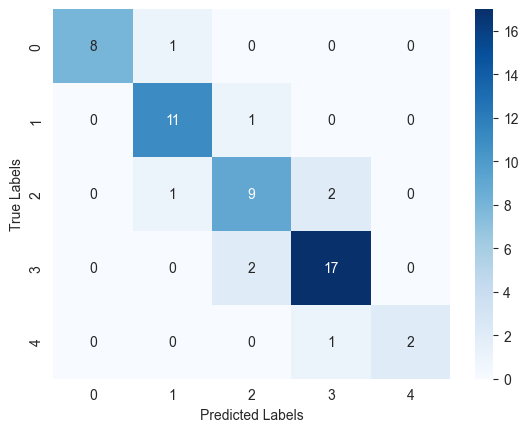

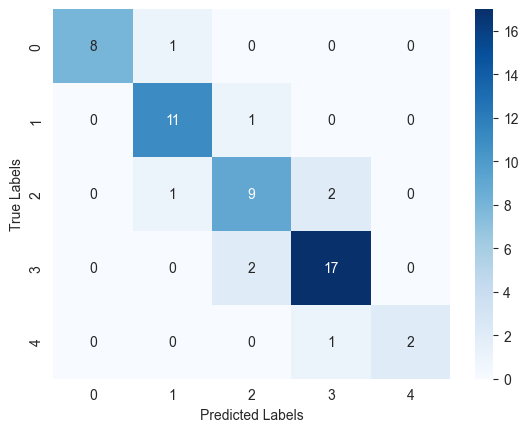

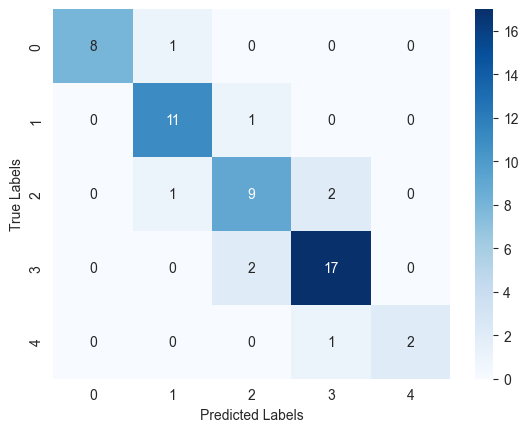

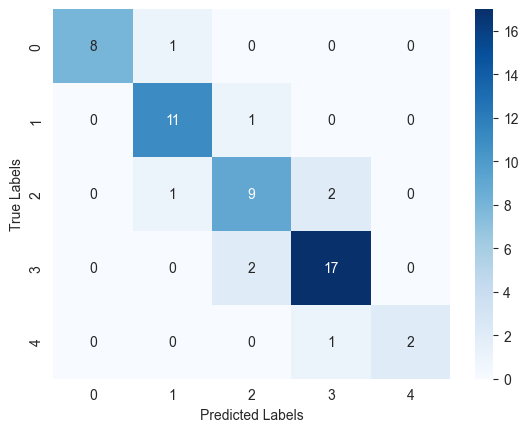

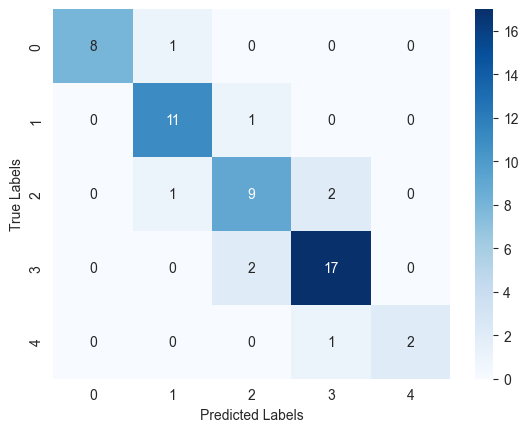

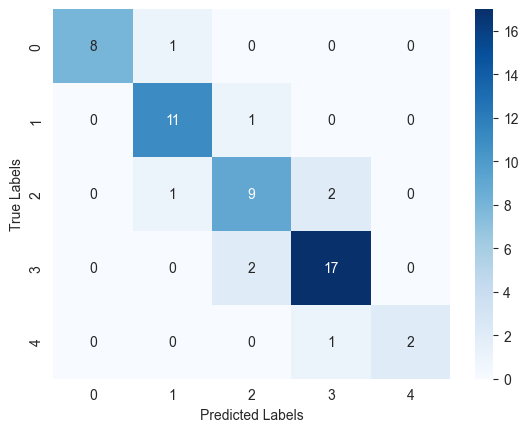

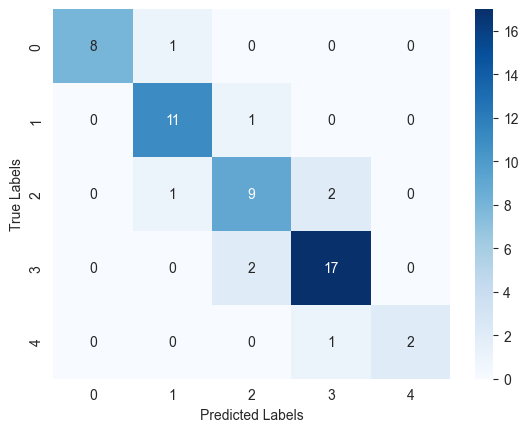

In [58]:
# Print the results
for name, result in results.items():
    print(f'{name}:')
    print('----------------------------------')
    print(f'F1 score: {result["F1 score"]}')
    print(f'Recall: {result["Recall"]}')
    print(f'Precision: {result["Precision"]}')
    print(f'Accuracy: {result["Accuracy"]}\n')

    # Plot the confusion matrix using seaborn
    sns.heatmap(cm, annot=True, cmap='Blues')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

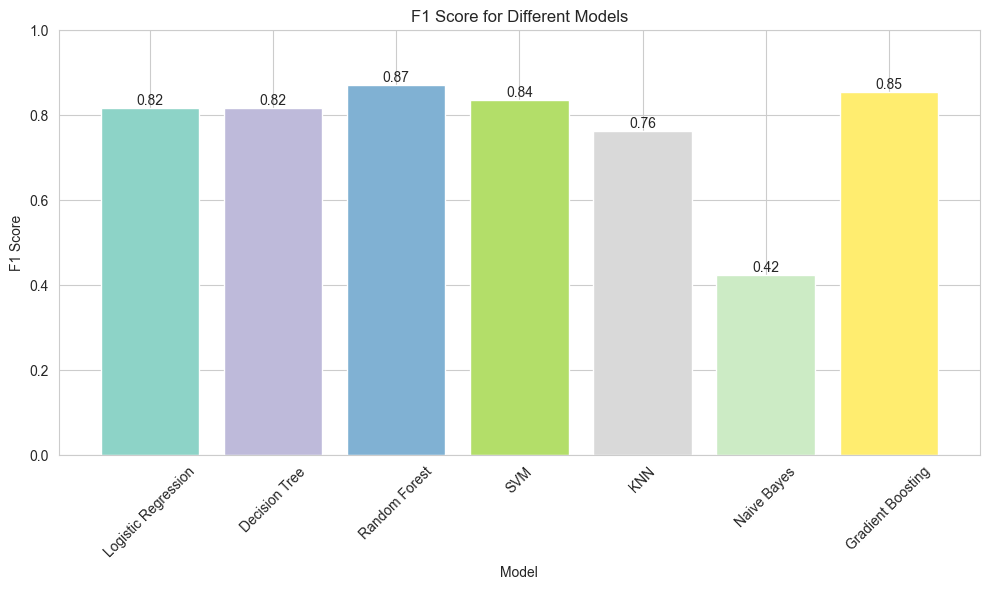

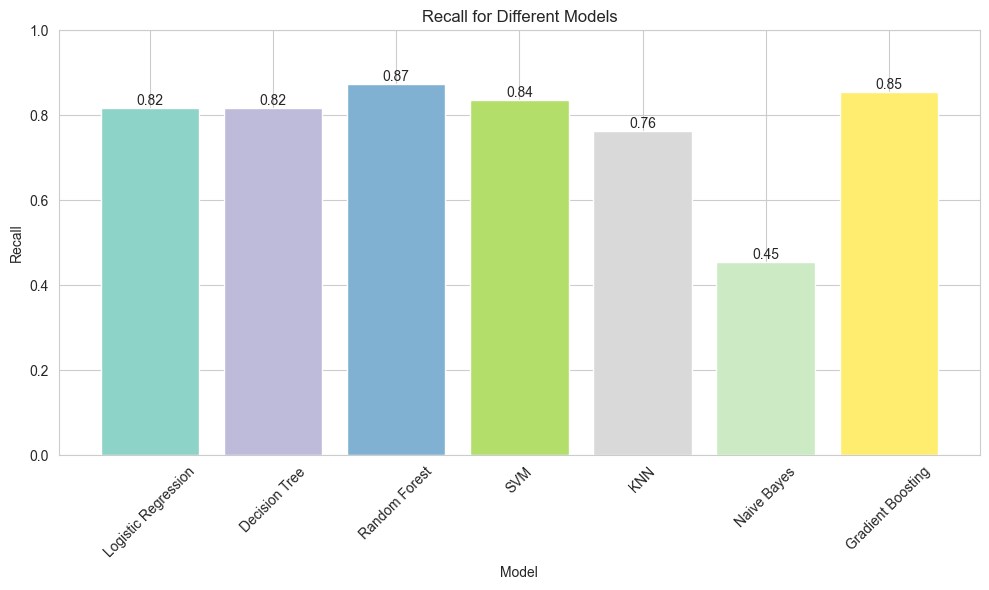

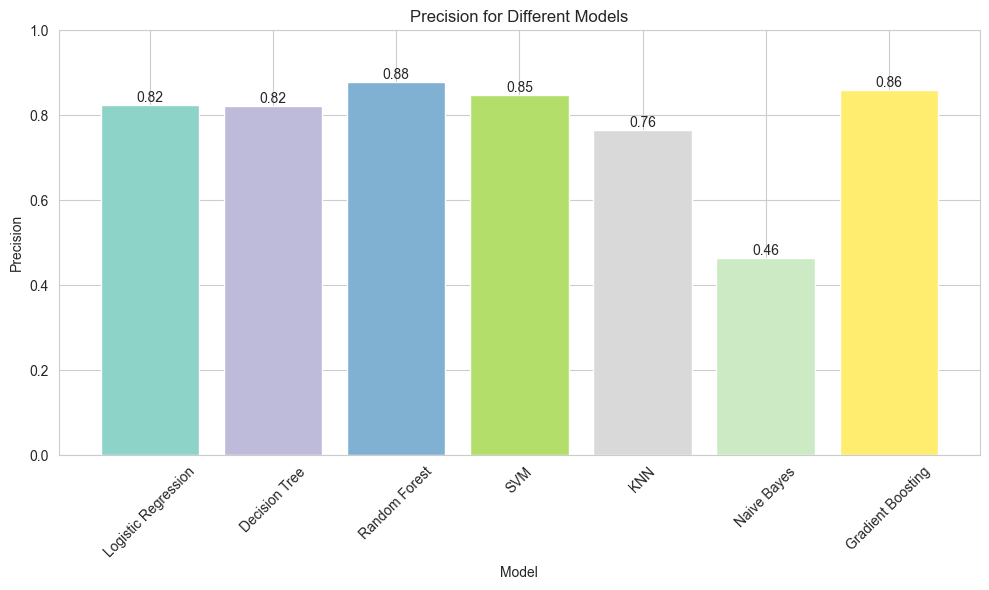

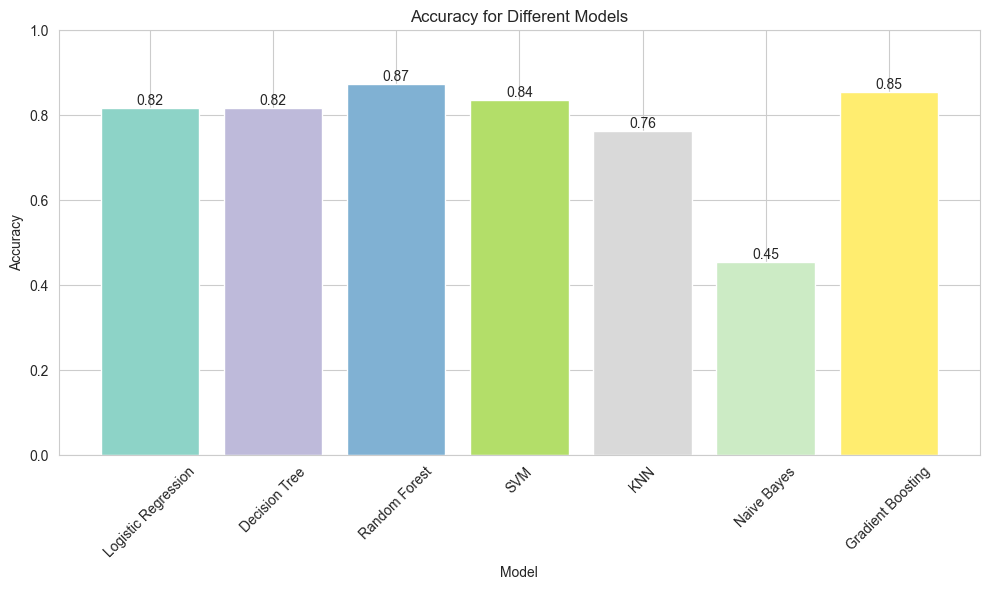

In [59]:
# Plot the results
# Extract the metrics for each model
models = list(results.keys())
f1_scores = [result['F1 score'] for result in results.values()]
recalls = [result['Recall'] for result in results.values()]
precisions = [result['Precision'] for result in results.values()]
accuracies = [result['Accuracy'] for result in results.values()]

# Set the color scheme
colors = plt.cm.Set3(np.linspace(0, 1, len(models)))

# Plot the F1 scores
plt.figure(figsize=(10, 6))
bars = plt.bar(models, f1_scores, color=colors)
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('F1 Score for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

# Repeat the same process for the other metrics...

# Plot the recalls
plt.figure(figsize=(10, 6))
bars = plt.bar(models, recalls, color=colors)
plt.xlabel('Model')
plt.ylabel('Recall')
plt.title('Recall for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

# Plot the precisions
plt.figure(figsize=(10, 6))
bars = plt.bar(models, precisions, color=colors)
plt.xlabel('Model')
plt.ylabel('Precision')
plt.title('Precision for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

# Plot the accuracies
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracies, color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Models')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Set the y-axis limits

# Add percentage labels to the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()  # Improve spacing between subplots
plt.show()

## 6. Model Selection and Training

In [60]:
# scaling for whole dataset
standard_scaler = StandardScaler()

x  = standard_scaler.fit_transform(x)

with open('harvest_data_scaler.pkl', 'wb') as f:
    pickle.dump(standard_scaler, f)

In [61]:
lr = RandomForestClassifier()

lr.fit(x, y_data)

# Save the model to a file
with open('harvest_classifier.pkl', 'wb') as f:
    pickle.dump(lr, f)

C:\Users\ACER\Documents\My mini Projects\ML\Banana Disease Prediction\venv\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


## 7. Inference

In [62]:
def get_harvest_prediction(data, classifier='harvest_classifier.pkl', ordinal_encoder_obj='harvest_data_ordinal_encoded.pkl', onehot_encoder_obj='harvest_data_one_hot_encoded.pkl', scaler_obj='harvest_data_scaler.pkl', y_encoder_obj='y_data_ordinal_encoded.pkl', verbose=False):
    """
    This function predicts the harvest of a banana crop based on the given input data.
    It loads the pre-trained model, encoders, and scaler using pickle and applies them on the input data to get the predictions.

    Args:
        data (dict): A dictionary containing the input data for the prediction. It must include the following keys:
            - 'Variety': The variety of the banana crop. (str)
            - 'Agro-climatic region': The agro-climatic region where the banana crop is grown. (str)
            - 'Plant density(Min=1,Max=5)': The plant density of the banana crop. (int)
            - 'Spacing between plants (m)': The spacing between plants in meters. (float)
            - 'Plant generation': The generation of the banana crop. (int)
            - 'Fertilizer type': The type of fertilizer used for the banana crop. (str)
            - 'Soil pH': The pH value of the soil. (float)
            - 'Amount of sunlight received': The amount of sunlight received by the banana crop. (str)
            - 'Watering schedule': The watering schedule for the banana crop. (str)
            - 'Number of leaves': The number of leaves on the banana crop. (int)
            - 'Height (m)': The height of the banana crop in meters. (float)
        classifier (str): The file path of the trained classifier object. Defaults to 'harvest_classifier.pkl'.
        ordinal_encoder_obj (str): The file path of the ordinal encoder object for 'Amount of sunlight received' and 'Watering schedule' columns. Defaults to 'harvest_data_ordinal_encoded.pkl'.
        onehot_encoder_obj (str): The file path of the one-hot encoder object for 'Variety', 'Agro-climatic region', and 'Fertilizer type' columns. Defaults to 'harvest_data_one_hot_encoded.pkl'.
        scaler_obj (str): The file path of the scaler object for scaling the encoded data. Defaults to 'harvest_data_scaler.pkl'.
        y_encoder_obj (str): The file path of the ordinal encoder object for the target variable 'Harvest'. Defaults to 'y_data_ordinal_encoded.pkl'.
        verbose (bool): Whether to print the predicted probabilities with encoded values. Defaults to False.

    Returns:
        tuple: A tuple containing two elements:
            - The predicted harvest in kilograms (str).
            - A dictionary containing the predicted probabilities for each harvest range. The keys are the harvest ranges and the values are the probabilities.

    Raises:
        KeyError: If the input data dictionary is missing one or more required keys.
        TypeError: If one or more input values have an invalid data type.
        ValueError: If the input values have an invalid value range.

    """

    # Validate input data
    required_keys = [
        'Variety', 'Agro-climatic region', 'Plant density(Min=1,Max=5)', 'Spacing between plants (m)', 'Plant generation',
        'Fertilizer type', 'Soil pH', 'Amount of sunlight received', 'Watering schedule',
        'Number of leaves', 'Height (m)'
    ]
    for key in required_keys:
        if key not in data:
            raise KeyError(f"Input data is missing '{key}' key.")

    # Validate values for each key in data
    valid_values = {
        'Variety': ['Amban Banana', 'Mysore Banana', 'Pisang Awak Banana', 'Silk Banana', 'Anamalu Banana'],
        'Agro-climatic region': ['Wet Zone', 'Dry Zone', 'Intermediate Zone'],
        'Plant density(Min=1,Max=5)': [1, 2, 3, 4, 5],
        'Pesticides used(Yes, No)': ['Yes', 'No'],
        'Fertilizer type': ['Non Organic', 'None', 'Organic', 'Both used'],
        'Soil pH': (1, 14),
        'Amount of sunlight received': ['Low', 'Moderate', 'High'],
        'Watering schedule': ['randomly', 'none', 'twice a week', '3 times a week', 'Daily'],
        'Plant generation': ['1', '2', '4', '3', '5', 'more than 5']
    }

    # Validate values for each key in data
    for key in valid_values:
        if key not in data:
            raise KeyError(f"Input data is missing '{key}' key.")

        if key in valid_values:
            value = data[key]
            if isinstance(value, str):
                if value not in valid_values[key]:
                    raise ValueError(f"Invalid value '{value}' for key '{key}'. Valid values are {valid_values[key]}.")
            elif isinstance(value, (int, float)):
                if isinstance(valid_values[key], tuple):
                    if not valid_values[key][0] <= value <= valid_values[key][1]:
                        raise ValueError(f"Invalid value '{value}' for key '{key}'. Valid values are between {valid_values[key][0]} and {valid_values[key][1]}.")
                elif isinstance(valid_values[key], list):
                    if value not in valid_values[key]:
                        raise ValueError(f"Invalid value '{value}' for key '{key}'. Valid values are {valid_values[key]}.")
            else:
                raise TypeError(f"Invalid data type for key '{key}'.")
        else:
            raise KeyError(f"Invalid key '{key}' in input data.")


    # validate and Load the model from file
    try:
        with open(classifier, 'rb') as f:
            harvest_classifier = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The trained model object `{classifier}` is not found.')

    # Load the encoder objects using pickle
    try:
        with open(ordinal_encoder_obj, 'rb') as f:
            oe = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The ordinal encoder objects `{ordinal_encoder_obj}`are not found.')
    try:
        with open(onehot_encoder_obj, 'rb') as f:
            ohe = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The onehot encoder objects `{onehot_encoder_obj}` are not found.')

    # Ordinal Encode categorical columns
    oe_cols = ['Amount of sunlight received', 'Watering schedule', 'Plant generation']
    # One-hot Encode categorical columns
    ohe_cols = ['Variety', 'Agro-climatic region', 'Fertilizer type', 'Pesticides used(Yes, No)']
    # columns that have numerical values
    other_columns = [
        'Plant density(Min=1,Max=5)',
        'Spacing between plants (m)',
        'Soil pH',
        'Number of leaves',
        'Height (m)'
    ]

    # data to dataframe
    data = pd.DataFrame.from_dict([data])

     # Ordinal encode data
    try:
        oe_data = oe.transform(data[oe_cols])
    except ValueError:
        raise ValueError('The values of "Amount of sunlight received" and/or "Watering schedule" are not valid.')

   # One-hot encode data
    try:
        ohe_data = ohe.transform(data[ohe_cols])
    except ValueError:
        raise ValueError('The values of "Variety", "Agro-climatic region", and/or "Fertilizer type" are not valid.')

     # get other column data
    non_categorical_data = data[other_columns].values
    # combine encoded data
    encoded_data = np.hstack([ohe_data, oe_data, non_categorical_data])

     # Load the scaler objects using pickle
    try:
        with open(scaler_obj, 'rb') as f:
            scaler = pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The scaler object `{scaler_obj}` is not found')

    try:
        normalized_data = scaler.transform(encoded_data)
    except ValueError as e:
        print(f"Error occurred while normalizing data: {e}")

    # get predictions
    pred_proba = harvest_classifier.predict_proba(normalized_data)
    pred = harvest_classifier.predict(normalized_data)

    # Load the encoder objects using pickle
    try:
        with open(y_encoder_obj, 'rb') as f:
            y_oe= pickle.load(f)
    except FileNotFoundError:
        raise Exception(f'The target variable ordinal encoder {y_encoder_obj} oject is not found')

    pred = y_oe.inverse_transform(pred.reshape(-1, 1)).flatten()
    labels = y_oe.inverse_transform(harvest_classifier.classes_.reshape(-1, 1)).flatten()

    # create predictions and probabilities dict
    pred_proba =  {label: format(probability, '.5f') for label, probability in zip(labels, pred_proba[0])}

    if verbose:
        # Print the predicted probabilities with encoded values
        print('Probabilities for each class: ')
        for i in pred_proba:
            print(f'\t{i}: {pred_proba[i]}')

    return pred[0], pred_proba

In [63]:
sample_data = {
    "Variety": "Amban Banana",
    "Agro-climatic region": "Wet Zone",
    "Plant density(Min=1,Max=5)": 1,
    "Spacing between plants (m)": 2.46,
    'Pesticides used(Yes, No)': 'Yes',
    "Plant generation": str(1),
    "Fertilizer type": "Non Organic",
    "Soil pH": 7.7,
    "Amount of sunlight received": "Low",
    "Watering schedule": "randomly",
    "Number of leaves": 16,
    "Height (m)": 2.0
}

get_harvest_prediction(data=sample_data, verbose=True)

Probabilities for each class: 
	0-9 kg: 0.18000
	10-19 kg: 0.08000
	20-29 kg: 0.25000
	30-39 kg: 0.38000
	40-49 kg: 0.11000


('30-39 kg',
 {'0-9 kg': '0.18000',
  '10-19 kg': '0.08000',
  '20-29 kg': '0.25000',
  '30-39 kg': '0.38000',
  '40-49 kg': '0.11000'})